# Generate radar pulse data for certain scattering distributions

Time is measured in units of $\tau$, the inverse bandwidth. However, sampling happens at a rate $\alpha /\tau$, where $\alpha\gg1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from dataclasses import dataclass


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))

/tmp/ipykernel_31884/1203755111.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))


[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-5.0, 5.0),
 (-20.0, 20.0)]

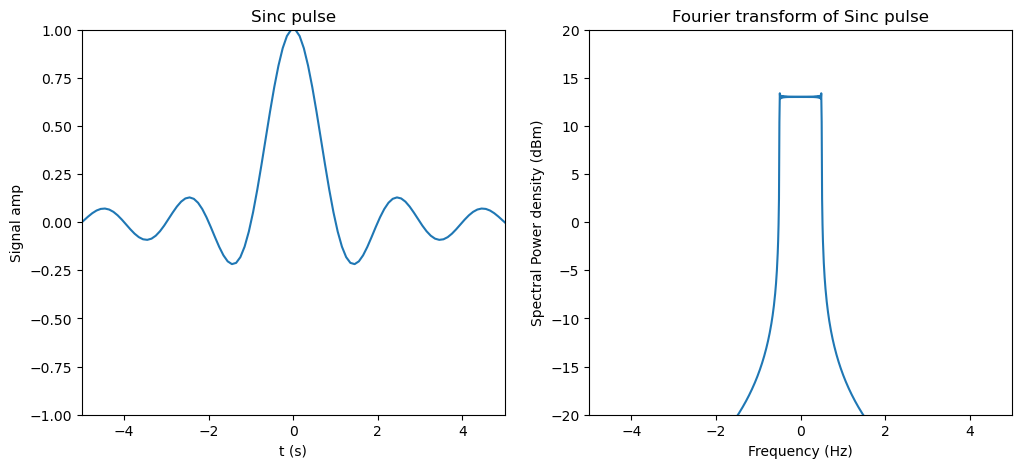

In [2]:
tau = 1.0 # s
sampling_rate = 10 # Hz
noise = 20 # dBm the noise floor of the signal. 
lims = 50 # extent of plot in units of tau
tlist = np.linspace(-lims, lims, sampling_rate*lims*2)
flist = norm2max(np.sinc(tlist))
# Compute the Fourier transform

f_sinc = fft.fft(flist)


frequencies = fft.fftfreq(tlist.size, d=1/sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist, flist) # to get unit bandwidth
ax[0].set(xlim=(-5, 5), ylim=(-1,1), xlabel='t (s)', ylabel='Signal amp', title='Sinc pulse')
ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))
ax[1].set(xlabel='Frequency (Hz)', ylabel='Spectral Power density (dBm)', title='Fourier transform of Sinc pulse', xlim=(-5,5), ylim=(-20, 20))


[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-1.5, 1.5),
 (-20.0, 20.0)]

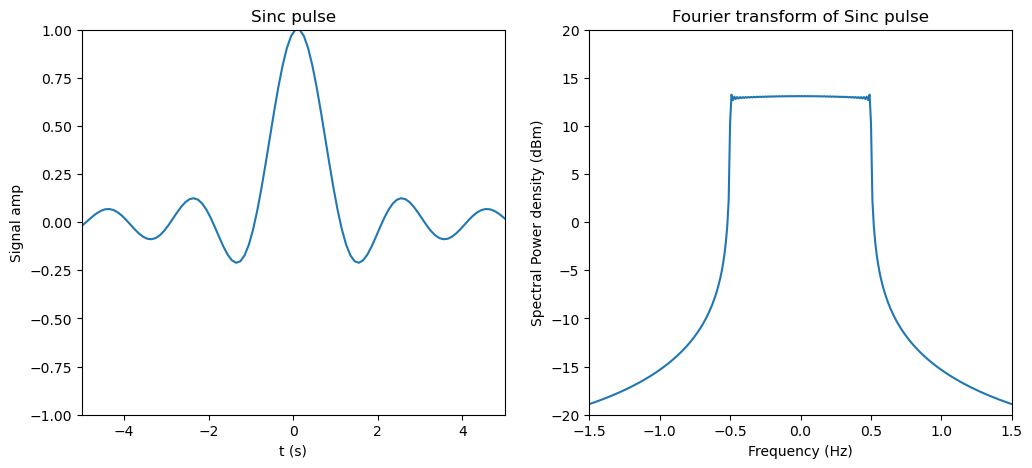

In [3]:
sep = 0.2
ret_sig = norm2max(np.sinc(tlist) + np.sinc(tlist - sep))




f_sinc = fft.fft( ret_sig)


frequencies = fft.fftfreq(tlist.size, d=1/sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist,  ret_sig) # to get unit bandwidth
ax[0].set(xlim=(-5, 5), ylim=(-1,1), xlabel='t (s)', ylabel='Signal amp', title='Sinc pulse')
ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))
ax[1].set(xlabel='Frequency (Hz)', ylabel='Spectral Power density (dBm)', title='Fourier transform of Sinc pulse', xlim=(-1.5,1.5), ylim=(-20, 20))

In [4]:
sep_list = np.linspace(-2, 2, 20000)
ret_sig_list = np.sinc(tlist) + np.sinc(tlist - sep_list[:, None])
ret_sig_list /= np.max(ret_sig_list, axis=1)[:, None]

data = np.hstack([ret_sig_list, np.abs(sep_list[ :, np.newaxis])])
np.savetxt('.data/sinc_data.txt', data, delimiter=',')

(-1.1, 1.1)

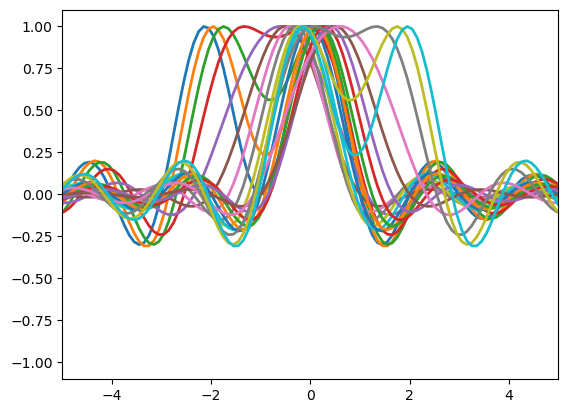

In [5]:
plt.plot(tlist, ret_sig_list.T[:, ::1000], lw=2);
plt.xlim(-5, 5)
plt.ylim(-1.1, 1.1)

# "Triangle Wave"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


rng = np.random.default_rng()


def pulse(
    t: float,
    m: int = 10,
    omega: float = 2 * np.pi,
):
    """
    Generates the pulse to be sent out

    Parameters:
    ============

    t: time point

    m: order of decay

    omega: Bandlimit
    """
    f_n = np.polynomial.Polynomial([0, 8, 0, -14.3984, 0, 4.77612, 0, -0.82315])
    c_m = np.sinc(omega * t / (m * np.pi)) ** m
    return c_m * f_n(t)


def rec(delay, t):
    return 0.5 * (pulse(t - delay / 2) + pulse(t + delay / 2))


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))


def noisy_signal(
    t: np.ndarray,
    delay: float,
    sigma: float = 0.01,
):
    """
    Generate a noisy signal normalized to 1
    """
    return norm2max(rec(delay=delay, t=t)) + rng.normal(scale=sigma, size=t.shape[0])


def generate_waves(
    tlist: np.ndarray,
    distances: np.ndarray,
    reflectivities: np.ndarray,
):
    """
    Generates the returned signal.

    Parameters:
    ===========

    tlist: list of times to generate return signals at

    distances: distances of scatterers

    reflectivites: reflectivites of scatterers

    """

    distances = np.asarray(distances)
    reflectivities = np.asarray(reflectivities)
    # Check equal shape
    if distances.shape != reflectivities.shape:
        raise Exception("Distances and reflectivities should have the same shape.")

    # Normalize reflectivities and distances.
    # Reflectivities should all add to 1.
    pass


/tmp/ipykernel_922/3069753344.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[(-10.0, 10.0), Text(0.5, 0, 'Time (a.u.)'), Text(0, 0.5, 'Amplitude (a.u.)')]

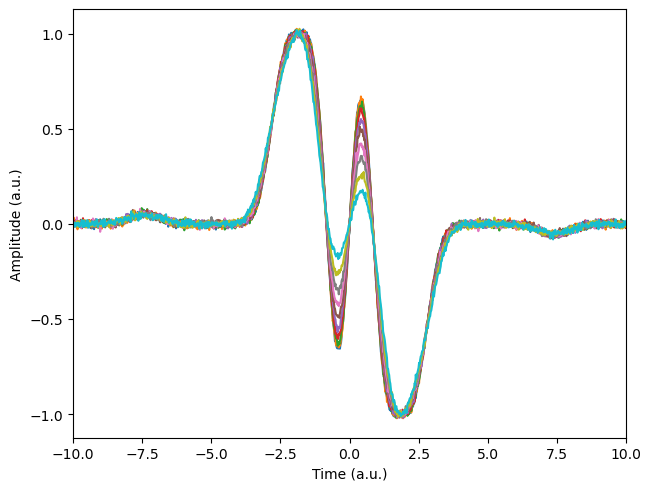

In [3]:

t = np.linspace(-10, 10, 1000)
shift_list = np.linspace(0, 0.7, 10)
ret_sigs = np.vstack([noisy_signal(t=t, delay=delay) for delay in shift_list])
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(t, ret_sigs.T)
ax.set(
    xlim=(np.min(t), np.max(t)),
    xlabel="Time (a.u.)",
    ylabel="Amplitude (a.u.)",
)

